# Advanced Legal Analytics
# LAW 3027 Tutorial 2: Introduction to Linear Regression and Classification


#### Intended Learning Outcomes:
This notebook provides a gentle introduction to Linear Regression.
By the end of this notebook you will know how to:
- Peform Regression Analysis to model the linear relationship between an independent and dependent variable
- Interpret the regression model and its parameters

#### Libraries to be used:
You can activate your previously used environment, though you will not use most packages from that environment. In this tutorial, we will use only the most commonly used python libraries such as: `pandas`, `numpy`, `matplotlib`, `scipy`, `seaborn` etc. 

We will use the Machine Learning library of Python, called Scikit Learn. You can use `pip` to install it. See the instructions here: https://scikit-learn.org/stable/install.html

### Linear Regression

#### 1.1
The model for a linear regression is described by the following formula:

$\hat{y_i} = \hat{\beta_0} + \hat{\beta_1}x_i $


which describes the relationship between two variables $x$ and $y$ (the subscript $i$ is a variable that represents the index of a given data point). Can you see from the formula why this model is a _linear_ regression?

In linear regression, one variable is called independent and another is dependent. 

Just looking at how the formula is written;  Which variable do you think is the dependent variable and which is the independent variable?

What are the other terms $\hat{\beta_0}$ and $\hat{\beta_1}$ ? 

##### 1.2 In the following picture, which regression line do you think best fits the data? How might you check?

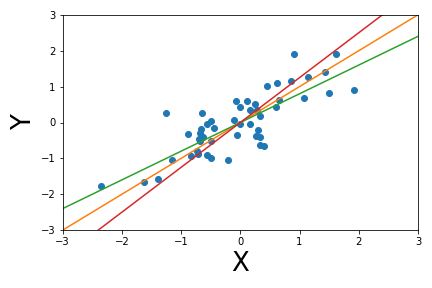

In [1]:
from IPython import display
display.Image("figs/regression_line.png")

##### 1.3 Watch the video below and discuss the answer to 1.2 after getting insights from the video.

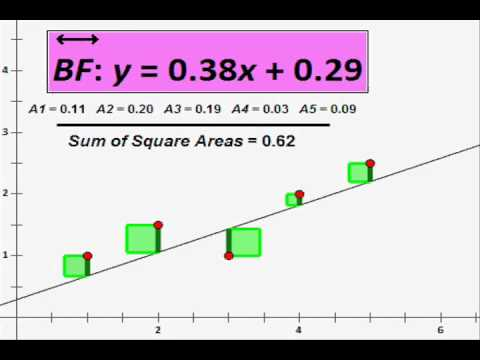

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("jEEJNz0RK4Q", width=600)

#### 2 The Swedish Auto Insurance Problem

The Swedish Auto Insurance Dataset involves predicting the total payment for all claims in thousands of Swedish Kronor, given the total number of claims. It is a regression problem. It is comprised of 63 observations with 1 input variable and one output variable. The variable names are as follows:

- X = Number of claims.
- Y = Total payment for all claims in thousands of Swedish Kronor.

#### 2.1 Load the dataset
The dataset is available at the following url : https://raw.githubusercontent.com/maastrichtlawtech/law3027-advanced-legal-analytics/main/data/insurance.csv 

Load the dataset using pandas. Create a dataframe, called `df_insurance` to load the data. 

#### 2.2 Inspect the data, do and exploratory data analysis and remove any anomalies (missing values, invalid values, etc.) 

#### 2.3 Peform a Visual Exploratory data analysis

Conduct a univariate visual exploratory data analysis on the dataset(you can plot the histograms, cumulative/probability distribution plots etc (feel free to recall the tutorial on Visual Exploratory Analysis from Legal Analytics Course).

What are your observations. Did you find some outliers? 

#### 2.4 Perform a Correlation Analysis between the two variables: Number of claims and Payment for all claims in Swedish Kronor

- Make a scattert plot between the two variables
- Compute the Pearson Correlation Coefficient between the two variables

- What are your observations? Is there a linear relationship between the two variables ?
- What is the magnitude of the correlation coefficient ?

#### 2.5 Preparing the data for Linear Regression
The variable names are as follows:

- X (Independent Variable) = Number of claims. 
- Y (Dependent Variable) = Total payment for all claims in thousands of Swedish Kronor.

In [ ]:
import numpy as np
X = df_insurance['Number_of_claims'].values
y = df_insurance['Payment_for_all_claims_in_Swedish_Kronor'].values
print(X,X.shape, X.ndim)
#Notice that X is a 1-dimensional array with a shape of (63,) 

In [ ]:
#scikit-learn expects a 2-D array
# we will use the array.reshape(shape) function to reshape the array. See here: https://www.geeksforgeeks.org/reshape-numpy-array/
#It takes a tuple as an argument. The tuple is the new shape to be formed
X = X.reshape((len(X), 1)) # the new data structure will have 63 arrays, each with 1 element
print(X, X.shape, X.ndim)

#### 2.6 Do the train-test split. Set the train_size = 0.8 (80% training and 20% testing set)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)
# see here for more details: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Note that we have split `X` into 2 parts: `X_train` and `X_test`. 
Similarly we have also split `y` into 2 parts: `y_train` and `y_test`

#### 2.7 Train the Linear Regression Model

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

#### 2.8 Compute the Slope and the Intercept

In [ ]:
print("Slope:{}".format(reg.coef_)) #underscore denotes that a quantity has been derived from training data
print("Intercept:{}".format(reg.intercept_))

Interpretation of the Slope: For each additional claim, the payment increases by 3.34 thousands of Swedish Kronor. 

#### 2.9 Make the predictions on the test set

We will use the trained linear regression model, `reg` to make predictions on the `X` values in the test set. The `x` values in the test set are given by `X_test`. The `y` values predictions on the `X_test` are stored in `y_pred` as indicated below.

In [ ]:
y_pred = reg.predict(X_test) #the predictions on the test set are stored in y_pred

#### 2.10 Predict the value of payment for an example value of the number of claims
What will be the payment for say, 56 claims ?

In [ ]:
reg.predict([[56]])

#### 2.11 Plot the predicted values for the test set using the Linear Regression Model (You need to plot the least squares regression line). Also plot the acutal test data.

#### 2.12 Compute the mean squared error and the R2 score

In [1]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error: {}'.format(mean_squared_error(y_test, y_pred)))
print('Coefficient of determination or R2 Score: {}'.format(r2_score(y_test, y_pred)))

NameError: name 'y_test' is not defined

## 3. Classification

This is an object recognition task in which you will train a supervised machine learning classifier to identify a fruit type based on certain features such as mass, width, height and color score.

#### 3.1 Read the dataset
The dataset is available here: https://raw.githubusercontent.com/maastrichtlawtech/law3027-advanced-legal-analytics/main/data/fruit_data_with_colours.csv

In [ ]:
url_fruits_db ='https://raw.githubusercontent.com/maastrichtlawtech/law3027-advanced-legal-analytics/main/data/fruit_data_with_colours.csv'
df_fruits = pd.read_csv(url_fruits_db)
df_fruits.head()

#### 3.2 Find out how many unique types of fruits are in the dataset ?

In [ ]:
df_fruits['fruit_name'].unique()

In [ ]:
df_fruits['fruit_label'].unique()

#### 3.3 Which label belongs to which fruit?

So, there are 4 types of fruits and we also have 4 fruit labels. Imagine if this dataset (in real life) contained hundreds of fruits, how would you know which label belongs to which fruit ?

Create a dictionary which maps fruits labels to fruit names.

#### 3.4 Choose the features and the target variable
X represents the input features and y represents the target variable whose value needs to be predicted.

In [ ]:
features_columns = ['mass','width','height','color_score'] # the features we have selected from the dataset
X = df_fruits[features_columns] # x contains the columns of the selected features: mass, width, height, color_score
y = df_fruits['fruit_label'] # y contains the fruit names

In [ ]:
#Print the features, X
X.head()

In [ ]:
#Print the target variable, y
y.head()

#### 3.5 Split the dataset into training and test set (75% training and 25% training)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)
len_train = len(X_train)
len_test = len(X_test)
print("Length of the training set: {}".format(len_train))
print("Length of the test set: {}".format(len_test))

#### 3.6 Train the KNN Classifier


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 5) # we set n_neigbours=5
neigh.fit(X_train, y_train)

#### 3.7 Compute the accuracy of the classifier on test data

In [ ]:
neigh.score(X_test, y_test)

#### 3.8 Print the confusion matrix. Compute the precision, recall and F-Score

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

y_pred = neigh.predict(X_test)
plot_confusion_matrix(neigh, X_test, y_test) 

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

#### 3.9 Use the trained classifier to classify new unseen instances

In [ ]:
unknown_fruit_1 = [300,200,300,0.7]
neigh.predict([unknown_fruit_1])

In [ ]:
#Query the dictionary to know the name of the fruit

#### 3.10 Bonus Exercise: For those interested to visualize the KNN Decision Boundary 

In [ ]:
!pip install yellowbrick

We need to select only 2 features to predict the fruit label because of the constraints of the visualization library Yellowbrick. So we select, `mass` and `color_score`. We train the KNN model on these 2 features to predict the fruit label. 

In [ ]:
from yellowbrick.contrib.classifier import DecisionViz
select_two_features = ['mass','color_score'] #limitations of 2 dimesions in yellowbrick
X = df_fruits[select_two_features]
y = df_fruits['fruit_label'] 

X = X.to_numpy()# for usage in yellowbrick module. Only numpy arrays are accepted
y = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Visualize the Decision Boundary of KNN on the training set. 

In [ ]:
viz = DecisionViz(
    KNeighborsClassifier(5), title="Nearest Neighbors",
    features=['mass', 'color_score'], classes=['apple','mandarin','orange','lemon']
)
viz.fit(X_train, y_train)
viz.draw(X_train, y_train) #viz.draw(X_test, y_test)
viz.show()